# Configuration Parameters

Located under /inputfiles

## General Parameters

Where have you stored the PlatoSim software?

    export PLATO_PROJECT_HOME=<full path to the PlatoSim3 directory>

General:

    ProjectLocation:             ENV['PLATO_PROJECT_HOME']

## Observing Parameters

ObservingParameters:

    NumExposures:     10                                 # Number of expsosures
    ExposureTime:     23                                 # Exposure time [s]
    RApointing:       180                                # Right ascension of platform pointing [degrees] 
    DecPointing:      -70                                # Declination of platform pointing [degrees]
    Fluxm0:           1.00238e8                          # Photon flux of a V=0 G2V-star [photons / s / m^2 / nm]
    SkyBackground:    220.                               # Stellar + zodiacal background level [photons / pixel / s]
    StarCatalogFile:  inputfiles/starField_RA180Dec-70.txt

#### Spacecraft pointing

The pointing of the spacecraft is the pointing of the platform, and is not identical to the pointing of the telescope (i.e. the optical axis).

#### Fluxm0

Calculation of the flux $F_{phot}$ of a star:

$$F_{phot} = t_{exposure} \cdot F_0 \cdot T_{\lambda} \cdot Q_{\lambda} \cdot A \cdot 10^{-0.4 m_{\lambda}} $$

#### SkyBackground

Uniform background contribution over the whole sub-field:
- positive: stellar + zodiacal background level [photons / pixel  / s]
- negative: computed automatically, based on:
    - position in the sky
    - throughput passband (central wavelength & width)
    - light-collecting area of the telescope
    - plate scale
    - exposure time

#### Star Catalogue

One line per source:
- right ascension [degrees]
- desclination [degrees]
- magnitude

## Platform Parameters

Platform:

    UseJitter:                   yes             # yes or no. If no, ignore everything below.
    UseJitterFromFile:           no              # yes or no. If yes, ignore RMS and timescale below.
    JitterYawRms:                1.0             # [arcsec]
    JitterPitchRms:              1.0             # [arcsec]
    JitterRollRms:               1.0             # [arcsec]
    JitterTimeScale:             3600.           # [s]
    JitterFileName:              inputfiles/jitter.txt

#### Jitter

Pointing variations of the spacecraft (platform), described in terms of Euler angles (yaw, pitch, roll).

<img src="SpacecraftCoordinateSystem.png">

##### From File

One line per jitter step:
- time [s]
- step in yaw [arcsec]
- step in pitch [arcsec]
- step in roll [arcsec]

##### Jitter Parameters

- standard deviation of normal distribution describing (yaw, pitch, roll) step
- timescale

Jitter noise will be generated in the time domain with the following power spectral density:

$$P(\nu) = \frac{\sigma^2 \tau}{1 + (2\pi\nu\tau)^2}$$

where $\sigma$ is the VarScale, and $\tau$ is the TimeScale.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (11, 10)

In [2]:
import os
baseDir    = os.getenv("PLATO_PROJECT_HOME")
currentDir = os.getcwd()

import sys
sys.path.append(baseDir + "/python")

(0.03, 5)

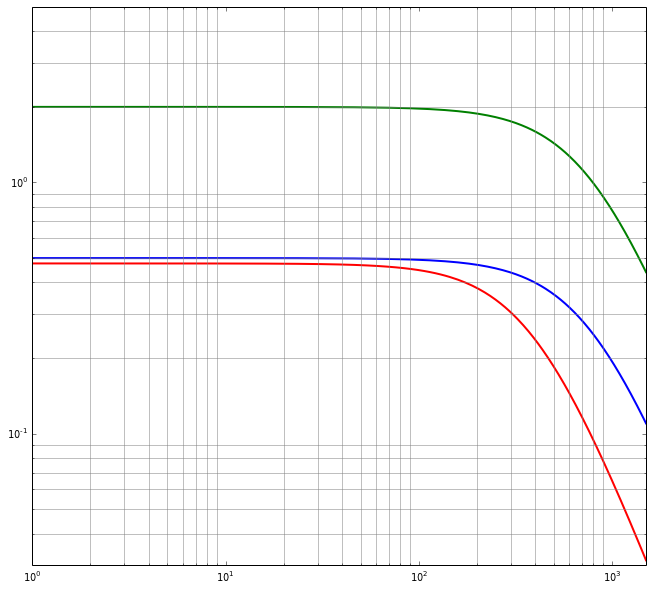

In [3]:
from numpy import *
from matplotlib import pyplot as plt
import noise
freq = linspace(1.0, 1500.0, 200)                                                   # [Ms]
plt.loglog(freq, noise.rednoiseModel(freq, [200e-6], [ 50.0]), c="b", linewidth=2)  # Tau = 200s [Ms], Sigma = 50 ppm
plt.loglog(freq, noise.rednoiseModel(freq, [400e-6], [ 34.5]), c="r", linewidth=2)  # Tau = 400s [Ms], Sigma = 34 ppm
plt.loglog(freq, noise.rednoiseModel(freq, [200e-6], [100.0]), c="g", linewidth=2)  # Tau = 200s [Ms], Sigma = 100 ppm
plt.grid(True, which='minor', axis='both', linestyle='-', color='gray')
plt.xlim(1.0, 1500)
plt.ylim(0.03, 5)

## Telescope Parameters

Telescope:
    
    AzimuthAngle:                0.0             # Azimuth angle of telescope on the platform [deg]
    TiltAngle:                   0.0             # Tilt angle of the telescope on the platform [deg]
    LightCollectingArea:         113.1           # Effective area of 1 telescope [cm^2]
    TransmissionEfficiency:      0.757           # in [0,1]
    UseDrift:                    no              # yes or no. If no, ignore everything below.
    UseDriftFromFile:            no              # yes or no. If yes: ignore RMS and timescale below
    DriftYawRms:                 2.0             # RMS of thermo-elastic drift in yaw [arcsec]
    DriftPitchRms:               2.0             # RMS of thermo-elastic drift in pitch [arcsec]
    DriftRollRms:                2.0             # RMS of thermo-elastic drift in roll [arcsec]
    DriftTimeScale:              86400.          # Timescale of thermo-elastic drift [s]
    DriftFileName:               inputfiles/drift.txt

#### Tilt & Azimuth

The telescope pointing (i.e. optical axis) can be derived from the platform pointing, and the tilt and azimuth angle.

<img src="tiltAzimuth.png">

#### Drift

Thermo-elastic instability of the telescope on the platform.

Similar to telescope jitter:
- from file
- drift parameters

## Camera Parameters

Camera:
    
    FocalPlaneOrientation:       0.0             # Focal-plane orientation [degrees]
    PlateScale:                  0.8333          # Plate scale [arcsec/micron]
    FocalLength:                 0.24712595      # Focal length as recovered from ZEMAX model [m]
    ThroughputBandwidth:         400             # FWHM [nm]
    ThroughputLambdaC:           600             # Central wavelength of the throughput passband [nm]
    IncludeFieldDistortion:      yes             # Wheter or not to include field distortion
    FieldDistortion:                             # Describe the model for the field distortion
        Type:                    Polynomial1D
        Degree:                  3
        Coefficients:            [-0.0036696919678, 1.0008542317, -4.12553764817e-05, 5.7201219949e-06]
        InverseCoefficients:     [-0.00458067036444, 1.00110311283, -5.61136295937e-05, -4.311925329e-06]

#### Focal-Plane Orientation

<img src="FocalPlaneCoordinateSystem.png">

#### Field Distortion

Image magnification increases with distance from the optical axis of the telescope.

- as 1D polynomial:

$$P(x) = c_{0} + c_{1} \cdot x + c_{2} \cdot x^{2} + ... + c_{n} \cdot x^{n}$$

- as 2D polynomial:

$$P(x, y) = c_{00} + c_{10} \cdot x + ... + c_{n0} \cdot x^{n} + c_{01} \cdot y      + ... + c_{0n} \cdot y^{n} + c_{11} \cdot x \cdot y + c_{12} \cdot x \cdot y^{2}      + ... + c_{1(n - 1)} \cdot x \cdot y^{n - 1} + ... + c_{(n - 1)1} \cdot x^{n - 1} \cdot y$$

## PSF Parameters

PSF:

    Model:              Gaussian        # Select the model to be used for the PSF [Gaussian, FromFile]
    Gaussian:                           # Generate the PSF from a 2D Gaussian function
      Sigma:            0.50            # Standard deviation of Gaussian PSF [pixels]
      NumberOfPixels:   8               # The number of pixels in the field for which the PSF is generated
    FromFile:                           # Read a pre-calculated PSF from an HDF5 file
      Filename:         inputfiles/psf.hdf5 
      DistanceToOA:     -1              # Angular distance to the optical axis. -1 to auto-compute. [deg]
      RotationAngle:    -1              # Rotation angle w.r.t the focal-plane x-axis. -1 to auto-compute. [deg]
      NumberOfPixels:   8               # The number of pixels in the field for which the PSF is generated

#### Pre-Computed PSF

Download from the FTP-server.

## CCD Parameters

CCD:

    OriginOffsetX:               0               # X Offset of CCD origin from center of focal plane [mm]
    OriginOffsetY:               0               # Y Offset of CCD origin from center of focal plane [mm]
    Orientation:                 0               # Orientation of CCD w.r.t. focal plane orientation [deg]
    NumColumns:                  4510            # Number of columns [pixels]
    NumRows:                     4510            # Number of rows [pixels]
    PixelSize:                   18              # Pi[micron]
    Gain:                        16              # [e-/ADU]
    QuantumEfficiency:           0.8745          # in [0,1]
    FullWellSaturation:          1000000         # Readout noise [e-/pixel]
    DigitalSaturation:           65535           # E.g. 16 bit [ADU/pixel]
    ReadoutNoise:                28              # [e-/pixel]
    ElectronicOffset:            100             # bias [ADU]
    ReadoutTime:                 2               # time to read out entire CCD [s]
    FlatfieldPtPNoise:           0.016           # peak-to-peak pixel noise
    CTI:
      Model:                     Simple
      Simple:
            MeanCTE:                     0.99999         # Mean Charge Transfer Efficiency
      Short2013:
            Beta:                    0.37                # beta exponent in Short et al. (2013)
            Temperature:             203.                # [K]
            NumTrapSpecies:          4                   # number of different trap species
            TrapDensity:             [9.8, 3.31, 1.56, 13.24]                   # for each trap species [traps/pixel]
            TrapCaptureCrossSection: [2.46e-20, 1.74e-22, 7.05e-23, 2.45e-23]     # for each trap species [m^2]
            ReleaseTime:             [2.37e-4, 2.43e-2, 2.03e-3, 1.40e-1]         # for each trap species [s]
   
    IncludeFlatfield:            yes             # Include flatfield [yes or no]
    IncludePhotonNoise:          yes             # Include photon noise [yes or no]
    IncludeReadoutNoise:         yes             # Include readout noise [yes or no]
    IncludeCTIeffects:           yes             # Include charge transfer inefficiency effects [yes or no]
    IncludeOpenShutterSmearing:  yes             # Include trails due reading out with an open shutter [yes or no]
    IncludeVignetting:           yes             # Include brightness attenuation towards the edge of the FOV
    IncludeConvolution:          yes             # Wheter or not to convolve the subPixelMap with the PSF
    IncludeFullWellSaturation:   yes             # Wheter or not full well saturation should be applied
    IncludeDigitalSaturation:    yes             # Whether or not digital saturation should be applied
    WriteSubPixelImagesToHDF5:   no              # Only use this for a limited number of exposures

#### CCD Reference Frame
<img src="FocalPlaneCoordinateSystem.png">

#### Quantum Efficiency

Ratio of the number of collected electrons to the number of incident photons.


#### Gain

Relates the number of electrons per pixels to the number of ADUs.

#### Saturation

##### Full-Well Saturation (Blooming)

Excess electrons get transferred up and down to other pixels in the same column.

##### Digital Saturation

Pixel values topped off at given saturation limit.

#### Readout Noise

Occurs due to the imperfect nature of the CCD amplifiers. When the electrons are transferred to the amplifier, the induced voltage is measured. However, this measurement is not perfect, but gives a value which is on average too high by an amount of the readout noise, with the squareroot of the readout noise as standard deviation.

#### Flatfield
Accounts for the differences in sensitivity across the detector (1/f spatial distribution).

#### CTI Effects

Because of detector defects, electrons can get trapped in the readout process. The trapped charge ends up getting dissociated from its original pixel and eventually gets released into another pixel. The result is that the original image gets smeared out in the direction away from the readout amplifier (visible in the appearance of "charge trails"). This is known as imperfect CTE (Charge-Transfer Efficiency) or alternatively as CTI (Charge-Transfer Inefficiency). The fraction of the charge that is successfully transferred from one row to the next row is expressed by this parameter.

#### Photon noise

Due to the discrete/quantised nature of the electronic charge carried by the e- (when counting them as representatives of photons hitting the detectors).  Implemented as Poisson distribution with the pixel value as mean (each pixel is treated independently).

## Sub-field Parameters

SubField:

    ZeroPointRow:                0               # Row of the (0,0) pixel of the sub-field [pixels]
    ZeroPointColumn:             0               # Column of the (0,0) pixel of the sub-field [pixels]
    NumColumns:                  100             # Number of columns, should be >= 8 [pixels]
    NumRows:                     100             # Number of rows, should be >= 8 [pixels]
    NumBiasPrescanRows:          5               # Nr of rows in pre-scan strip to determine the bias [pixels]
    NumSmearingOverscanRows:     5               # Nr rows in over-scan strip to determine the smearing [pixels]
    SubPixels:                   8               # (Sqrt of) nr of subpixels per CCD pixel. Should be 2^n <= 128.

## Random Seeds

RandomSeeds:

    ReadOutNoiseSeed:            1424949740
    PhotonNoiseSeed:             1433320336
    JitterSeed:                  1433320381
    FlatFieldSeed:               1425284070
    CTESeed:                     1424949740
    DriftSeed:                   1433429158